# Abordagem de seleção de features RFE

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [2]:
# Obtendo dataset
train_path = '../datasets/health/train.gz'
test_path = '../datasets/health/test.gz'

train_data = pd.read_csv(train_path, compression='gzip')
test_data = pd.read_csv(test_path, compression='gzip')

train_data.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var992,var993,var994,var995,var996,var997,var998,var999,var1000,alvo
0,2142.0,4397.0,8978.0,17329.0,25324.0,1515.0,3053.0,6295.0,12179.0,17714.0,...,0.00,0.00,0.00,0.00,0.00,0.00,3849.11,1.0,0,0
1,4230.0,8477.0,16253.0,31545.0,46576.0,3151.0,6286.0,12021.0,23391.0,34501.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0
2,123016.0,253889.0,479469.0,949783.0,1423562.0,84625.0,173262.0,327248.0,648115.0,971543.0,...,2872.32,2872.32,1217.18,12423.70,21092.96,35177.31,66642.75,13.0,0,0
3,7646.0,15987.0,31309.0,60711.0,88139.0,5760.0,11899.0,23219.0,45452.0,66126.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0
4,5442.0,10358.0,20710.0,40147.0,61672.0,1940.0,3900.0,7825.0,15161.0,22792.0,...,1045782.67,1645343.02,245300.63,514644.76,1628928.12,3211634.36,6019027.97,3940.0,0,0


## **Pré-processamento** do dataset

In [3]:
def fill_mean(data):
    df = data.fillna(data.mean())
    y = df['alvo']
    X = df.drop('alvo', axis=1)
    return X, y

In [4]:
train_X, train_y = fill_mean(train_data)
test_X, test_y = fill_mean(test_data)

## Seleção de váriaveis

In [5]:
rf_model = RandomForestClassifier()
rfe = RFE(rf_model, n_features_to_select=100)

In [6]:
X_train_rfe = rfe.fit_transform(train_X, train_y)
X_test_rfe = rfe.transform(test_X)
rf_model.fit(X_train_rfe, train_y)

RandomForestClassifier()

In [13]:
selected_features = train_X.columns[rfe.support_]
print(selected_features)

Index(['var265', 'var270', 'var271', 'var272', 'var286', 'var287', 'var288',
       'var290', 'var291', 'var293', 'var294', 'var297', 'var298', 'var300',
       'var312', 'var316', 'var331', 'var332', 'var333', 'var334', 'var342',
       'var346', 'var347', 'var388', 'var397', 'var398', 'var408', 'var457',
       'var458', 'var509', 'var510', 'var511', 'var514', 'var515', 'var516',
       'var532', 'var534', 'var537', 'var541', 'var542', 'var557', 'var558',
       'var572', 'var573', 'var574', 'var575', 'var577', 'var579', 'var587',
       'var607', 'var615', 'var617', 'var618', 'var691', 'var692', 'var693',
       'var695', 'var696', 'var699', 'var700', 'var701', 'var704', 'var705',
       'var706', 'var714', 'var715', 'var716', 'var717', 'var718', 'var721',
       'var724', 'var725', 'var888', 'var889', 'var890', 'var940', 'var970',
       'var971', 'var972', 'var973', 'var974', 'var975', 'var976', 'var977',
       'var978', 'var980', 'var981', 'var982', 'var983', 'var985', 'var986',

In [ ]:
def print_confusion_matrix(cm):

  fig, ax = plot_confusion_matrix(conf_mat=cm, colorbar=True, figsize=(5, 5), cmap='Greys', show_absolute=True, show_normed=True)
  ax.set_title("Confusion Matrix")
  plt.show()

In [ ]:
train_predict_proba = rf_model.predict_proba(X_train_rfe)[:, 1]
test_predict_proba = rf_model.predict_proba(X_test_rfe)[:, 1]

Área Sob a Curva ROC (Treino): 1.0
Área Sob a Curva ROC (Teste): 1.0
Matriz de Confusão (Treino):


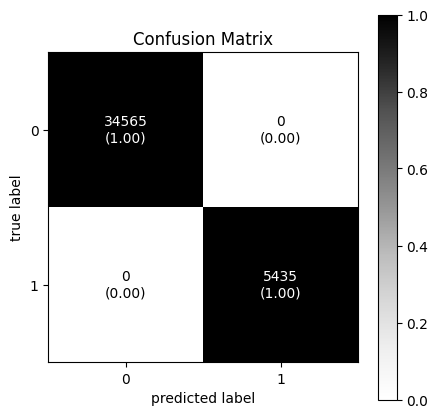

Matriz de Confusão (Teste):


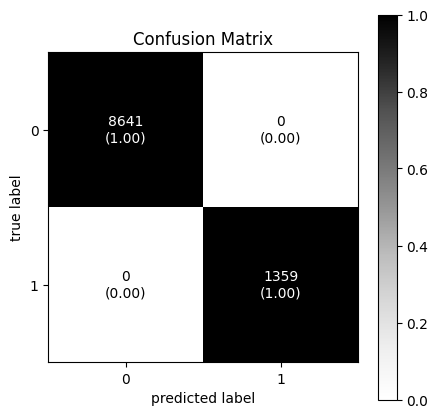

In [8]:
roc_auc_treino = roc_auc_score(train_y, train_predict_proba)
roc_auc_teste = roc_auc_score(test_y, test_predict_proba)
print("Área Sob a Curva ROC (Treino):", roc_auc_treino)
print("Área Sob a Curva ROC (Teste):", roc_auc_teste)
matriz_confusao_treino = confusion_matrix(train_y, train_predict_proba > 0.5)
matriz_confusao_teste = confusion_matrix(test_y, test_predict_proba > 0.5)

print("Matriz de Confusão (Treino):")
print_confusion_matrix(matriz_confusao_treino)
print("Matriz de Confusão (Teste):")
print_confusion_matrix(matriz_confusao_teste)